In [1]:
# libraries import
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from numpy.linalg import solve
from generate_signal import generate_sin
from interpolate import interpolate_2x
from decimate import decimate_2x
from signal_resample import signal_resampler

1000

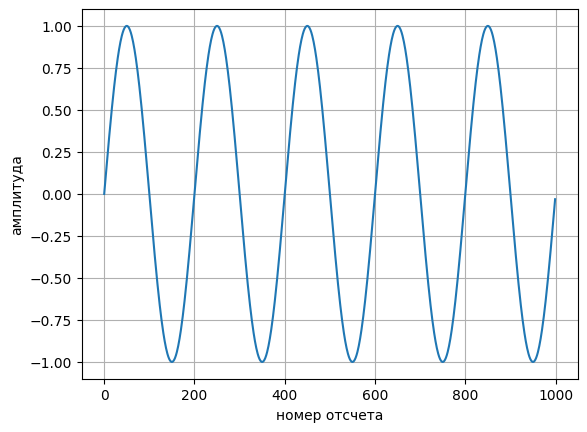

In [2]:
# signal generate
freq = 0.5
sample_count = 10  # number of samples

initial_signal = generate_sin(freq, sample_count)
plt.plot(initial_signal)
plt.grid()
plt.ylabel('амплитуда')
plt.xlabel('номер отсчета')
len(initial_signal)

Text(0.5, 1.0, 'После Децимации(уменьшения частоты дискретизации в 2 раза)')

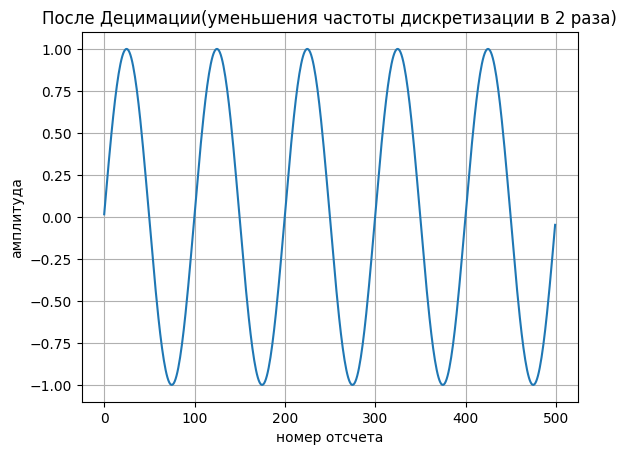

In [3]:
decimated = decimate_2x(initial_signal)
plt.plot(decimated)
plt.grid()
plt.ylabel('амплитуда')
plt.xlabel('номер отсчета')
len(decimated)
plt.title('После Децимации(уменьшения частоты дискретизации в 2 раза)')

999

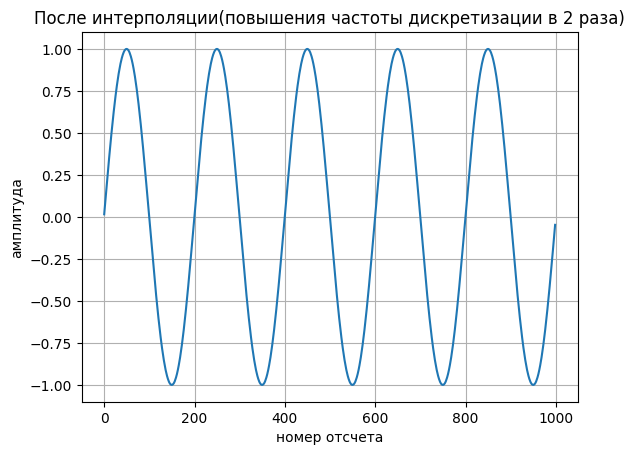

In [4]:
# линейная интерполяция

processed = interpolate_2x(decimated)
plt.plot(processed)
plt.grid()
plt.ylabel('амплитуда')
plt.xlabel('номер отсчета')
plt.title('После интерполяции(повышения частоты дискретизации в 2 раза)')
len(processed)

In [5]:
# Обрезаем до исходной длины
initial_signal = initial_signal[:len(processed)]

# Расчет ошибки (нормированной среднеквадратичной)
error = round(float(np.sqrt(np.mean((initial_signal - processed)**2)) / np.sqrt(np.mean(initial_signal**2)) * 100), 2)
print('Error = ', error, '%')  # in %

Error =  1.57 %


In [6]:
# Для смены частоты дискретизации в произвольное число раз (уменьшение и увеличение) можно использовать интерполяционный полином Лагранжа (signal_resample)
# Теперь проанализируем зависимость такой относительной ошибки от частоты исходного сигнала
count = 50
frequencies = np.linspace(0.5, 50, count)  # Диапазон анализируемых частот (0-50 Гц для fs=100 Гц)
errors = [0] * count


for i in range(count):
    # Генерация исходного сигнала
    freq = frequencies[i]
    # print(freq)
    original = generate_sin(freq, sample_count)
    
    # Обработка: децимация -> интерполяция
    decimated = decimate_2x(original)
    processed = interpolate_2x(decimated)
    
    # Обрезаем до исходной длины
    original = original[:len(processed)]
    
    # Расчет ошибки (нормированной среднеквадратичной) в процентах
    error = round(float(np.sqrt(np.mean((original - processed)**2)) / np.sqrt(np.mean(original**2))), 2)
    errors[i] = error
    # print(error)
    
errors

[0.02,
 0.05,
 0.08,
 0.11,
 0.14,
 0.18,
 0.21,
 0.25,
 0.28,
 0.32,
 0.36,
 0.39,
 0.43,
 0.47,
 0.51,
 0.55,
 0.59,
 0.62,
 0.66,
 0.7,
 0.73,
 0.77,
 0.8,
 0.83,
 0.86,
 0.89,
 0.91,
 0.93,
 0.95,
 0.97,
 0.99,
 1.0,
 1.01,
 1.02,
 1.03,
 1.03,
 1.03,
 1.03,
 1.03,
 1.03,
 1.03,
 1.02,
 1.02,
 1.02,
 1.01,
 1.01,
 1.0,
 1.0,
 1.0,
 0.88]

/var/folders/0j/gv7k7zxd3nn22v71mrdfwjfh0000gn/T/ipykernel_16977/856453823.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


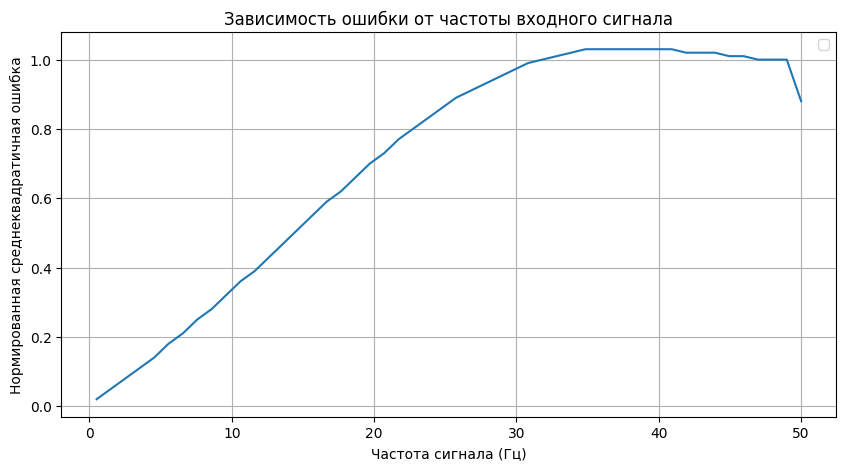

In [7]:
# Построение графика
plt.figure(figsize=(10, 5))
plt.plot(frequencies, errors)
plt.title('Зависимость ошибки от частоты входного сигнала')
plt.xlabel('Частота сигнала (Гц)')
plt.ylabel('Нормированная среднеквадратичная ошибка')
plt.grid(True)
plt.legend()
plt.show()

Вывод:
При частоте дискретизации 100 Гц частота Найквиста составляет 50 Гц
Это означает, что теоретически можно точно представить только сигналы с частотами ниже 50 Гц

Низкие частоты (0-20 Гц):
Ошибка минимальна (0-20%)
Сигнал хорошо сохраняется, так как находится далеко от границы Найквиста
Антиалиасинговый фильтр практически не влияет на эти частоты

Средние частоты (20-40 Гц):
Ошибка постепенно растет (20-60%)
Начинает сказываться влияние:
Ограничений линейной интерполяции

Высокие частоты (40-50 Гц и выше):
Ошибка резко возрастает до 80-100%
Основные причины:
Необратимая потеря информации: интерполятор не может восстановить утраченные высокочастотные компоненты
Нарушение теоремы Котельникова: для частот ≥50 Гц исходный сигнал принципиально невосстановим при fs=100 Гц

Когда ошибка достигает 100% для высоких частот, это означает, что:
Выходной сигнал полностью не соответствует входному
Все полезные частотные компоненты потеряны

Более того Критическая частота 25 Гц:
После децимации до 50 Гц это новая частота Найквиста
Все, что выше - принципиально невосстановимо
